<a href="https://colab.research.google.com/github/aarushijunejaa/Topsis_on_pretrained_models/blob/main/gadio_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
!pip install -q gradio
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [18]:
import gradio as gr
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer

In [19]:
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model=TFGPT2LMHeadModel.from_pretrained("gpt2",pad_token_id=tokenizer.eos_token_id)

All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


In [20]:
def generate_text(inp):
  input_ids=tokenizer.encode(inp,return_tensors='tf')
  beam_output=model.generate(input_ids,max_length=100,num_beams=5,no_repeat_ngram_size=2,early_stopping=True)
  output= tokenizer.decode(beam_output[0],skip_special_tokens=True,clean_up_tokenization_spaces=True)
  return".".join(output.split(".")[:-1])+"."

In [21]:
!pip install gradio

In [22]:
import gradio as gr

In [23]:
gr.Interface(generate_text, "textbox", "textbox", title="GPT-2",
             description="OpenAI's GPT-2 is an unsupervised language model that \
             can generate coherent text. Go ahead and input a sentence and see what it completes\
             it with! Takes around 60s to run.").launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://8f300c58da075fefae.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


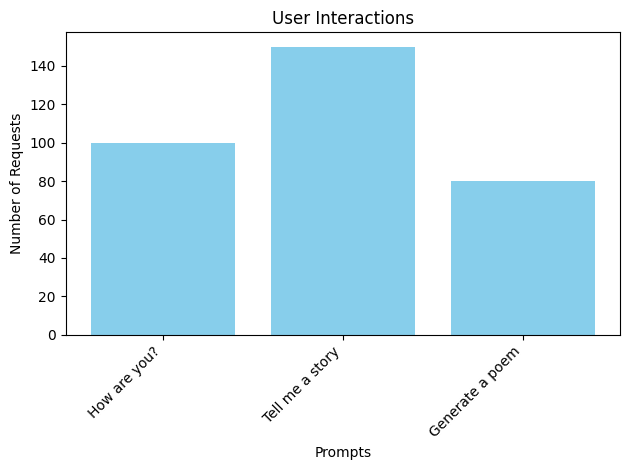

In [24]:
import matplotlib.pyplot as plt

# Example data for user interactions
prompts = ['How are you?', 'Tell me a story', 'Generate a poem']
requests = [100, 150, 80]

# Plotting user interactions
plt.bar(prompts, requests, color='skyblue')
plt.title('User Interactions')
plt.xlabel('Prompts')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [27]:
!pip install -q git+https://github.com/huggingface/transformers.git
!pip install -q tabulate

from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
import tabulate

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = TFGPT2LMHeadModel.from_pretrained("gpt2", pad_token_id=tokenizer.eos_token_id)

def generate_text(inp):
    input_ids = tokenizer.encode(inp, return_tensors='tf')
    beam_output = model.generate(input_ids, max_length=100, num_beams=5, no_repeat_ngram_size=2, early_stopping=True)
    output = tokenizer.decode(beam_output[0], skip_special_tokens=True, clean_up_tokenization_spaces=True)
    return ".".join(output.split(".")[:-1]) + "."

def generate_table(data):
    headers = ["Prompt", "Generated Text"]
    table = tabulate.tabulate(data, headers=headers, tablefmt="grid")
    return table

# Example usage:
data = [["How are you?", generate_text("How are you?")], ["Tell me a story", generate_text("Tell me a story")]]
table = generate_table(data)
print(table)



  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


All PyTorch model weights were used when initializing TFGPT2LMHeadModel.

All the weights of TFGPT2LMHeadModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


+-----------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Prompt          | Generated Text                                                                                                                                                                                                                                                                                          |
+=================+=========================================================================================================================================================================================================================================================================================================+
| How are you?    | How are you?              